In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

In [25]:
# Read the dataset
path = 'winequality-red.csv'
df = pd.read_csv(path, delimiter=';')

In [26]:
# Output the dataset
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [27]:
# Output the data types from dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


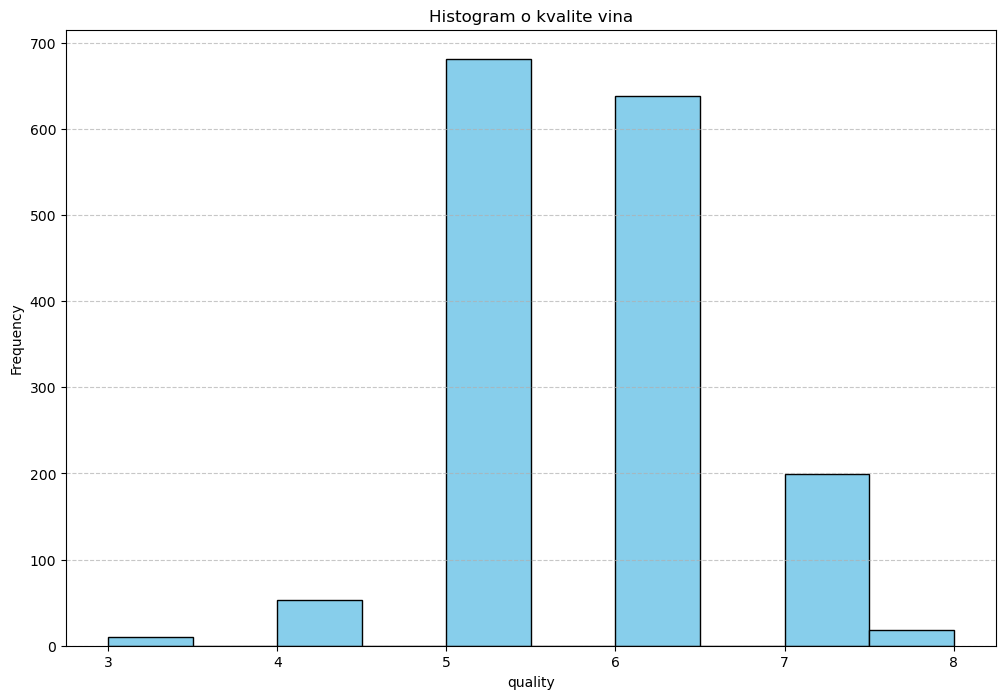

In [34]:
# Display the histogram for quality attribute
plt.figure(figsize=(12, 8))
plt.hist(df['quality'], bins=10, color='skyblue', edgecolor='black')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Histogram o kvalite vina')
plt.xlabel('quality')
plt.ylabel('Frequency')
plt.show()

In [29]:
# Perform discretization of the target attribute into three classes (top, medium, low quality) 
df['quality_discrete'] = pd.cut(df['quality'], bins=3, labels=['low quality', 'medium quality', 'top quality']) 

In [31]:
df[['quality', 'quality_discrete']].head(10)

,quality,quality_discrete
0,5,medium quality
1,5,medium quality
2,5,medium quality
3,6,medium quality
4,5,medium quality
5,5,medium quality
6,5,medium quality
7,7,top quality
8,7,top quality
9,5,medium quality


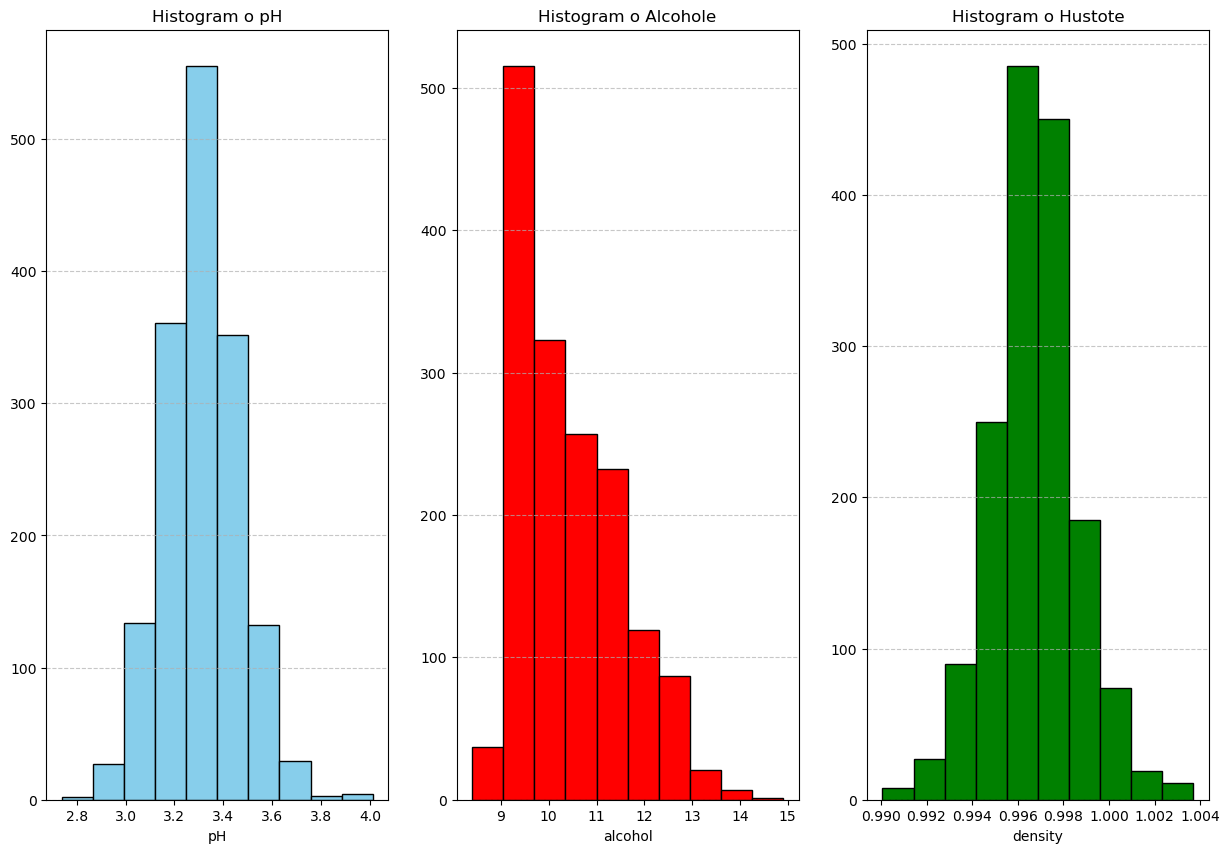

In [112]:
# Display the histogram for pH, alcohol, density attributes
plt.figure(figsize=(15, 10))
plt.subplot(131)
plt.hist(df['pH'], bins=10, color='skyblue', edgecolor='black')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Histogram o pH')
plt.xlabel('pH')

plt.subplot(132)
plt.hist(df['alcohol'], bins=10, color='red', edgecolor='black')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Histogram o Alcohole')
plt.xlabel('alcohol')

plt.subplot(133)
plt.hist(df['density'], bins=10, color='green', edgecolor='black')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Histogram o Hustote')
plt.xlabel('density')

plt.show()

In [42]:
# Discrete to pH, alcohol, density attributes
pH_bins = [0, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.2]
pH_labels = ['Very Low', 'Low', 'Below Medium', 'Medium', 'Above Medium', 'High', 'Very High']
df['pH_discrete'] = pd.cut(df['pH'], bins=pH_bins, labels=pH_labels)

alcohol_bins = [0, 9, 10, 11, 12, 13, 14, 15]
alcohol_labels = ['Very Low', 'Low', 'Below Medium', 'Medium', 'Above Medium', 'High', 'Very High']
df['alcohol_discrete'] = pd.cut(df['alcohol'], bins=alcohol_bins, labels=alcohol_labels)

density_bins = [0.99, 0.992, 0.994, 0.996, 0.998, 1.0, 1.002, 1.004]
density_labels = ['Very Low', 'Low', 'Below Medium', 'Medium', 'Above Medium', 'High', 'Very High']
df['density_discrete'] = pd.cut(df['density'], bins=density_bins, labels=density_labels)

In [43]:
df[['pH', 'pH_discrete', 'alcohol', 'alcohol_discrete', 'density', 'density_discrete']].head()

,pH,pH_discrete,alcohol,alcohol_discrete,density,density_discrete
0,3.51,Above Medium,9.4,Low,0.9978,Medium
1,3.20,Below Medium,9.8,Low,0.9968,Medium
2,3.26,Medium,9.8,Low,0.9970,Medium
3,3.16,Below Medium,9.8,Low,0.9980,Medium
4,3.51,Above Medium,9.4,Low,0.9978,Medium


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         1599 non-null   float64 
 1   volatile acidity      1599 non-null   float64 
 2   citric acid           1599 non-null   float64 
 3   residual sugar        1599 non-null   float64 
 4   chlorides             1599 non-null   float64 
 5   free sulfur dioxide   1599 non-null   float64 
 6   total sulfur dioxide  1599 non-null   float64 
 7   density               1599 non-null   float64 
 8   pH                    1599 non-null   float64 
 9   sulphates             1599 non-null   float64 
 10  alcohol               1599 non-null   float64 
 11  quality               1599 non-null   int64   
 12  quality_discrete      1599 non-null   category
 13  pH_discrete           1599 non-null   category
 14  alcohol_discrete      1599 non-null   category
 15  dens

In [113]:
# Do Label encoder and Train Test Split

df['alcohol_discrete_encoder'] = LabelEncoder().fit_transform(df['alcohol_discrete'])
df['pH_discrete_encoder'] = LabelEncoder().fit_transform(df['pH_discrete'])
df['density_discrete_encoder'] = LabelEncoder().fit_transform(df['density_discrete'])
df['quality_discrete_encoder'] = LabelEncoder().fit_transform(df['quality_discrete'])


X = df[['alcohol_discrete_encoder', 'pH_discrete_encoder', 'density_discrete_encoder']]
y = df['quality_discrete_encoder']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [61]:
df[['alcohol_discrete_encoder', 'pH_discrete_encoder', 'density_discrete_encoder', 'quality_discrete_encoder']]

,alcohol_discrete_encoder,pH_discrete_encoder,density_discrete_encoder,quality_discrete_encoder
0,3,0,4,1
1,3,1,4,1
2,3,4,4,1
3,3,1,4,1
4,3,0,4,1
...,...,...,...,...
1594,1,0,1,1
1595,4,0,1,1
1596,1,0,1,1
1597,1,0,1,1


In [62]:
df[['alcohol_discrete_encoder', 'pH_discrete_encoder', 'density_discrete_encoder', 'quality_discrete_encoder']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   alcohol_discrete_encoder  1599 non-null   int64
 1   pH_discrete_encoder       1599 non-null   int64
 2   density_discrete_encoder  1599 non-null   int64
 3   quality_discrete_encoder  1599 non-null   int64
dtypes: int64(4)
memory usage: 50.1 KB


In [114]:
# Create the model - Naive Bayes

model = CategoricalNB()

model.fit(X_train, y_train)

CategoricalNB()

In [115]:
# Prediction
y_pred = model.predict(X_test)

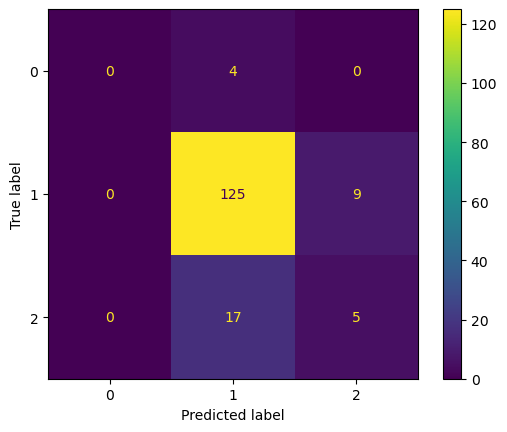

                precision    recall  f1-score   support

   low quality       0.00      0.00      0.00         4
medium quality       0.86      0.93      0.89       134
   top quality       0.36      0.23      0.28        22

      accuracy                           0.81       160
     macro avg       0.40      0.39      0.39       160
  weighted avg       0.77      0.81      0.79       160



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [116]:
# Show the results

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.show()

target_names = ['low quality', 'medium quality', 'top quality']
print(classification_report(y_test, y_pred, target_names=target_names))

In [119]:
df.iloc[:, 7:].head(25)

,density,pH,sulphates,alcohol,quality,quality_discrete,pH_discrete,alcohol_discrete,density_discrete,alcohol_discrete_encoder,pH_discrete_encoder,density__discrete_encoder,density_discrete_encoder,quality_discrete_encoder
0,0.9978,3.51,0.56,9.4,5,medium quality,Above Medium,Low,Medium,3,0,4,4,1
1,0.9968,3.20,0.68,9.8,5,medium quality,Below Medium,Low,Medium,3,1,4,4,1
2,0.9970,3.26,0.65,9.8,5,medium quality,Medium,Low,Medium,3,4,4,4,1
3,0.9980,3.16,0.58,9.8,6,medium quality,Below Medium,Low,Medium,3,1,4,4,1
4,0.9978,3.51,0.56,9.4,5,medium quality,Above Medium,Low,Medium,3,0,4,4,1
5,0.9978,3.51,0.56,9.4,5,medium quality,Above Medium,Low,Medium,3,0,4,4,1
6,0.9964,3.30,0.46,9.4,5,medium quality,Medium,Low,Medium,3,4,4,4,1
7,0.9946,3.39,0.47,10.0,7,top quality,Medium,Low,Below Medium,3,4,1,1,2
8,0.9968,3.36,0.57,9.5,7,top quality,Medium,Low,Medium,3,4,4,4,2
9,0.9978,3.35,0.80,10.5,5,medium quality,Medium,Below Medium,Medium,1,4,4,4,1
